<a href="https://colab.research.google.com/github/gasujina-prog/Python25Study/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트 세트를 나누어 평가를 진행하는데
# 근데 결국 테스트 세트로 평가를 하면 테스트 세트에 맞는 모델이 만들어지는 결론이 나온다
# 테스트세트에 일반화 성능을 올바르게 예측하려면 가능한 한
# 테스트세트를 사용하지 말아야 한다.
# 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트해봤는데 이것이 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝해보자.

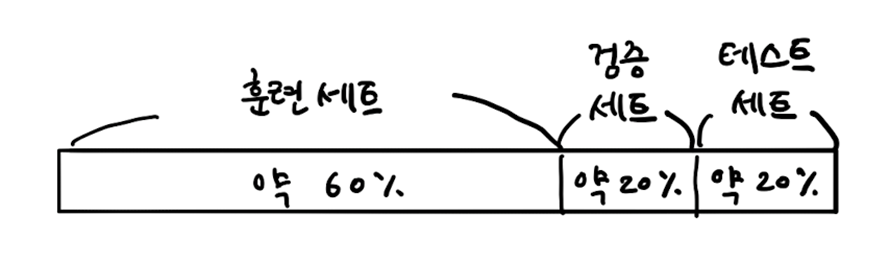

In [72]:
# 검증세트
# 테스트세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지않고 측정하는 간단한 방법은
# 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증 세트 20%, 테스트세트 20% → 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐
# 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트 세트를 이용해 최종 점수를 평가함.

In [73]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # data 에 wine의 앞 3가지 특성을 넣음
target = wine[['class']].to_numpy() # target에 나누고자 한 class을 넣음

from sklearn.model_selection import train_test_split # 훈련/테스트 세트 나눔

train_input, test_input, train_target, test_target= train_test_split(data, target, test_size=0.2, random_state=42)
#테스트 세트 20%로 설정
print(train_input.shape, test_input.shape) #훈련세트 5197개/3개 특성, 테스트 세트 1300개/3개 특성

(5197, 3) (1300, 3)


In [74]:
#검증세트 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)
# 원래 5197개였던 훈련세트가 4157개로 줄고, 검증세트가 1040개가 됨. ※특성 갯수는 그대로!!

(4157, 3) (1040, 3)


In [75]:
#sub_input, sub_target과 val_input, val_target을 사용해 모델 생성 후 평가
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target) #훈-련

print(dt.score(sub_input, sub_target)) # 출력 99.71% - 과대 적합 발생!!
print(dt.score(val_input, val_target)) # 검증 86.44%

# 매개변수 변경을 해서 더 좋은 모델탐색 필요

0.9971133028626413
0.864423076923077


In [76]:
# 검증세트 만드느라 훈련세트가 줄음 (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어내어 평가하는 과정을 여러번 반복
#[훈련 훈련 검증]
#[훈련 검증 훈련]
#[검증 훈련 훈련] →패리티 방식(3-폴드 교차 검증) → 5, 10 폴드 도 있음!
#사이킷 런에서는 cross_validate()라는 교차검증 함수를 사용

from sklearn.model_selection import cross_validate
# 평가할 모델 객체를 첫번째 매개변수로 전달 함(직접 검증세트를 떼지않고 훈련세트 전체를 전달함)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수 를 변경함 cv=5(기본값)
print(scores)
# 각각 훈련시간(fit_time), 검증시간(score_time), 최종점수(test_score) 키를 가진 딕셔너리 (k:v)를 반환함

{'fit_time': array([0.02310586, 0.01783395, 0.01547337, 0.01460171, 0.01417899]), 'score_time': array([0.00214767, 0.00220442, 0.00217199, 0.00220919, 0.00334001]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [77]:
# {'fit_time : 훈련시간 ': array([0.01590347, 0.01357985, 0.0125258 , 0.01266432, 0.01209831]),
#  'score_time : 검증시간 ': array([0.0026319 , 0.00208259, 0.00182867, 0.00198817, 0.00206494]),
#  'test_score : 검증점수 ': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [78]:
import numpy as np

print(np.mean(scores['test_score'])) # test_score 이름이지만 검증폴드의 점수임
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다.85.53%

0.855300214703487


In [79]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 → 분할기(splitter) 사용
# 앞서 우리는 train_test_split() 함수로 전체 데이터를 섞은 후 훈련 세트를 준비함
# 만약 교차검증 할 때 훈련세트를 섞으려면 분할기 지정이 필요

# 사이킷 런의 분할기는 교차검증에서 폴드를 어떻게 나눌지 결정함
# cross_validata(는) 기본적으로 회귀모델인 KFold 분할기를 사용함
# 뷴류 모델일 경우 타깃 클래스를 골고루 나누기 위해서 startifiedKFold를 사용한다
from sklearn.model_selection import StratifiedKFold

#scores = cross_validate(dt,train_input, train_target, cv=StartifiKFold())
splitter = StratifiedKFold()
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)

{'fit_time': array([0.01787376, 0.01705217, 0.01487851, 0.01451206, 0.01436353]), 'score_time': array([0.0021441 , 0.0020206 , 0.0022192 , 0.00208139, 0.0021069 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [80]:
# {'fit_time': array([0.02692175, 0.03336358, 0.02086091, 0.03042316, 0.02657533]),
#  'score_time': array([0.00191808, 0.00214911, 0.00205112, 0.00239015, 0.00949883]),
#   'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
print(np.mean(scores['test_score']))

0.855300214703487


In [81]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10폴드 교차 검증 수행
scores= cross_validate(dt, train_input, train_target, cv=splitter)
print(scores) # 10번의 교차검증이 진행
print(np.mean(scores['test_score'])) #그에 대한 검증 평균은 85.74%

{'fit_time': array([0.01676083, 0.02063251, 0.01657486, 0.02213645, 0.01596951,
       0.01671743, 0.01830745, 0.02328825, 0.01663947, 0.01783562]), 'score_time': array([0.00222516, 0.00205255, 0.00206232, 0.00210524, 0.00186729,
       0.00224686, 0.00204039, 0.00331569, 0.00192523, 0.00828099]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [82]:
# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야 함
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함

# 하이퍼파라미터 튜닝
# 모델 파라미터 : 머신런닝 모델이 학습하는 파라미터
# 하이퍼파라미터 : 사용자가 지정해야만 하는 파라미터
# 하이퍼파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
# 그 다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경 1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

# Max_depth 를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
# -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함 -> 다중 for문을 사용해야 됨(복잡해 짐)
# 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV # 그리드 서치크로스 검증용
# min_impurity_decrease : 매개변수의 최적값을 찾아보자
# min_sample_split : 샘플을 최소한 몇개 이상이어야 split(하위노드로 분리) 할것인지
params={'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
# 매개변수와 탐색할 값을 리스트를 딕셔너리로 만듬
# params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9번
#           'max_depth': range(5, 20, 1),                              # 5~20까지 15번
#           'min_samples_split': range(2, 100, 10)   # 분할 할 수 있는 샘플수를 지정 2~100까지 10번
#           }

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# 결정 트리 클래스의 객체를 생성하자마자 바로 전달함
# 일반 모델을 훈련하는것 처럼 fit()메서드를 호출함
# 이 메서드를 호출하면 서치 객체는 결정 트리모델 min_impurity_decrease 값을 바꿔가며 5번 수행
# n_jobs 에서 병렬실행에 사용될 cpu 코어수 지정. -1이면 모든 코어다.

gs.fit(train_input, train_target) #그리드 서치를 이용한 훈련시작
# 교차 검증에서 최적의 하이퍼 파라미터를 찾으면 전체 훈련세트로 모델을 다시 만들어야 하나
# 사이킷헌의 그리드 서치는 검증 점수가 가장 높른 모델의 매개변수 조합으로
# 전체 훈련 세트에서 자동으로 다시 모델을 훈련함


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [84]:
# 이렇게 최적화되어 훈련된 모델은 GridSearchCV 클래스로 만들어진
# 객체의 best_estimator_ (에스티메이터) 속성에 저장되어 있다.
# 최적의 매개변수는 best_params_ 속성에 저장되어 있다.
print(f"그리드 서치를 통해 찾은 최적의 모델의 정확도 : {dt.score(train_input, train_target)*100:.2f}%")
# 그리드 서치를 통해 찾은 최적의 모델의 정확도 : 97.06%

그리드 서치를 통해 찾은 최적의 모델의 정확도 : 97.06%


In [85]:
print(f"최적의 매개변수 : {gs.best_params_}") # 암기...되려나 이거
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score'키에 저장되어 있다.
# 최적의 매개변수 : {'min_impurity_decrease': 0.0001}

최적의 매개변수 : {'min_impurity_decrease': 0.0001}


In [86]:
# 5번의 교차 검증으로 얻은 점수를 출력해보자.
print(gs.cv_results_['mean_test_score']) # 첫 번째 값이 가장 큰것 같다!!!
# [0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [87]:
# 눈으로 보는 것 보다 넘파이를 이용해 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params 키에 저장된 매개변수를 출력해보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.
best_index = np.argmax(gs.cv_results_['mean_test_score']) # 0.86819297
print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_params_ 과 같은지 확인!

# 과정 요약
# 1. 탐색할 매개변수 지정
# 2. 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾음
#    -> 그리드 서치에 저장
# 3. 그리드 서치는 최상의 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련
#    -> 그리드 서치에 저장

{'min_impurity_decrease': 0.0001}


In [88]:
# 조금 더 복잡한 매개변수 조합 해보겠음
# 노드를 분할하기 위한 불순도 감소 최소량 지정 max_depth(트리의 깊이)
# min_samples_split 노드를 나누기 위한 최소 샘플 수
# 넘파이 arange() 함수는 첫번째 매개변수 값에서 시작해서
# 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만듬

# 0.0001 ~ 0.001까지 0.0001을 더한 배열 (두번째 매개변수는 포함되지 않음) = 9번
# 파이썬 range() 함수는 정수만 사용가능 5~20까지 1씩 증가 = 15개
# 교차 검증 회수 9*15*10=1350개 * 5(5-폴드교차) = 6750개
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9번
          'max_depth': range(5, 20, 1),                              # 5~20까지 15번
          'min_samples_split': range(2, 100, 10)   # 분할 할 수 있는 샘플수를 지정 2~100까지 10번
          }
# criterion : 분할 품질을 측정하는 기능
# splitter : 각 노드에서 분할을 선택하는데 사용되는전략
# max_depth : 트리의 최대깊이
# min_samples_split :지식 노드를 분할하는데 필요한 최소 샘플 수
# min_samples_leaf : 리프노드에 있어야할 최소 샘플 수
# min_weight_fraction_leaf : min_samples_leaf랑 같지만 가중치가 부여된 샘플 수에서의 비율
# max_features : 각 노드에서 분할에 사용할 특징의 최대 수
# random_state : 난수 seed 설정
# max_leaf_nodes : 리프 노드의 최대수
# min_impurity_decrease : 최소 불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치
# class_weight :클래스 가중치
# presort : 데이터 정렬 필요 여부

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target) # 훈련시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [89]:
print(gs.best_params_) # 최상의 매개변수 조합확인

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [90]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 점수 확인
# 개선점 : 탐색할 매개변수 간격을 0.0001 혹은 1로 설정 했는데 근거 부족(좁히거나 넓힐 필요성?)

0.8683865773302731


In [91]:
# 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있음
# 너무 많은 매개 변수 조건이 있어 그리드 서치 수행시간이 오래 걸림

# 해결 : 랜덤 서치를 사용해보자.

# 랜덤서치 : 매개변수의 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포도 객체를 전달
# 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분, 보간, 선형대수, 확률 등 포함한 수치 계산용 전용 라이브러리(코랩에 내장)

from scipy.stats import uniform, randint
# uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다.(균등 분포에서 샘플링)
# randint()에서는 정수값을 추출, uniform()은 실수값을 뽑음

In [92]:
# 랜덤서치 테스트
rgen = randint(0, 10) # 10개 숫자를 샘플링(학생마다 다름)
rgen.rvs(10)
# 10개밖에 되지 않기 때문에 고르게 샘플링되는 것 같지 않지만 샘플링 숫자를 늘리면 쉽게 확인 할 수 있다.
# array([5, 8, 2, 6, 4, 9, 1, 2, 6, 4])

array([5, 1, 4, 7, 3, 3, 3, 9, 2, 7])

In [93]:
np.unique(rgen.rvs(1000), return_counts=True) # 1000개를 샘플링해서 각 숫자의 개수를 세어봄
# (array([0,     1,   2,   3,   4,   5,   6,   7,   8,   9]),
#  array([108,  92,  92,  92, 108,  98, 103, 103, 107,  97]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104,  98, 112,  93,  97, 113,  74, 107, 112,  90]))

In [94]:
ugen = uniform(0, 1) # 실수형 테스트
ugen.rvs(10) #난수 발생기

array([0.91977296, 0.68041052, 0.98704067, 0.05907319, 0.17998561,
       0.58610266, 0.97188963, 0.67045073, 0.14001843, 0.49746277])

In [95]:
# 탐색할 매개변수의 딕서너리를 만들어봄
#min_samples_leaf을 탐색 대상에 추가(랜덤값을 하이퍼파라이터 값으로 적용)
params = {'min_impurity_decrease': uniform(0.0001, 0.001),  # 0.00001~0.001 의 실수값
          'max_depth':randint(20, 50),                      # 20~50 사이의 정수
          'min_samples_split': randint(2, 25),              # 2~25 사이의 정수
          'min_samples_leaf': randint(1, 25),               # 1~25 사이의 정수
          # 리프 도드가 되기위한 최소 샘플 개수(지식 노드의 샘플 수가 이 값보다 작으면 분할 하지 않음!)
          }

In [96]:
# 어짜피 하이퍼파라미터의 매개값을 랜덤으로 하기로 했으니 검증하는 cv클래스도 랜덤용으로 사용해보자.
# 샘플링 횟수는 사이킷런의 램덤 서치 클래스인 RandomizedSearchCV의 n_iter 매개변수에 지정
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                         n_iter=100, n_jobs=-1, random_state=42)
#n_iter=100 총 100번 샘플링해서 교차검증 수행

gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7d8c65caa0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7d8cfc06b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7d8cf2fb90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7d8cf1c2f0>},
                   random_state=42)

In [97]:
print(gs.best_params_) # 결과 최적의 매개변수 조합을 찾음
# {'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173,
#  'min_samples_leaf': 7, 'min_samples_split': 13}

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [98]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최고의 교차 검증 점수 확인
# 86.95%의 검증 점수

0.8695428296438884


In [99]:
dt = gs.best_estimator_
# 최종 모델로 결정하고 테스트 세트의 성능을 확인
print(dt.score(test_input, test_target)) # 검증점수 86.95%, 테스트 점수 86.00%

0.86


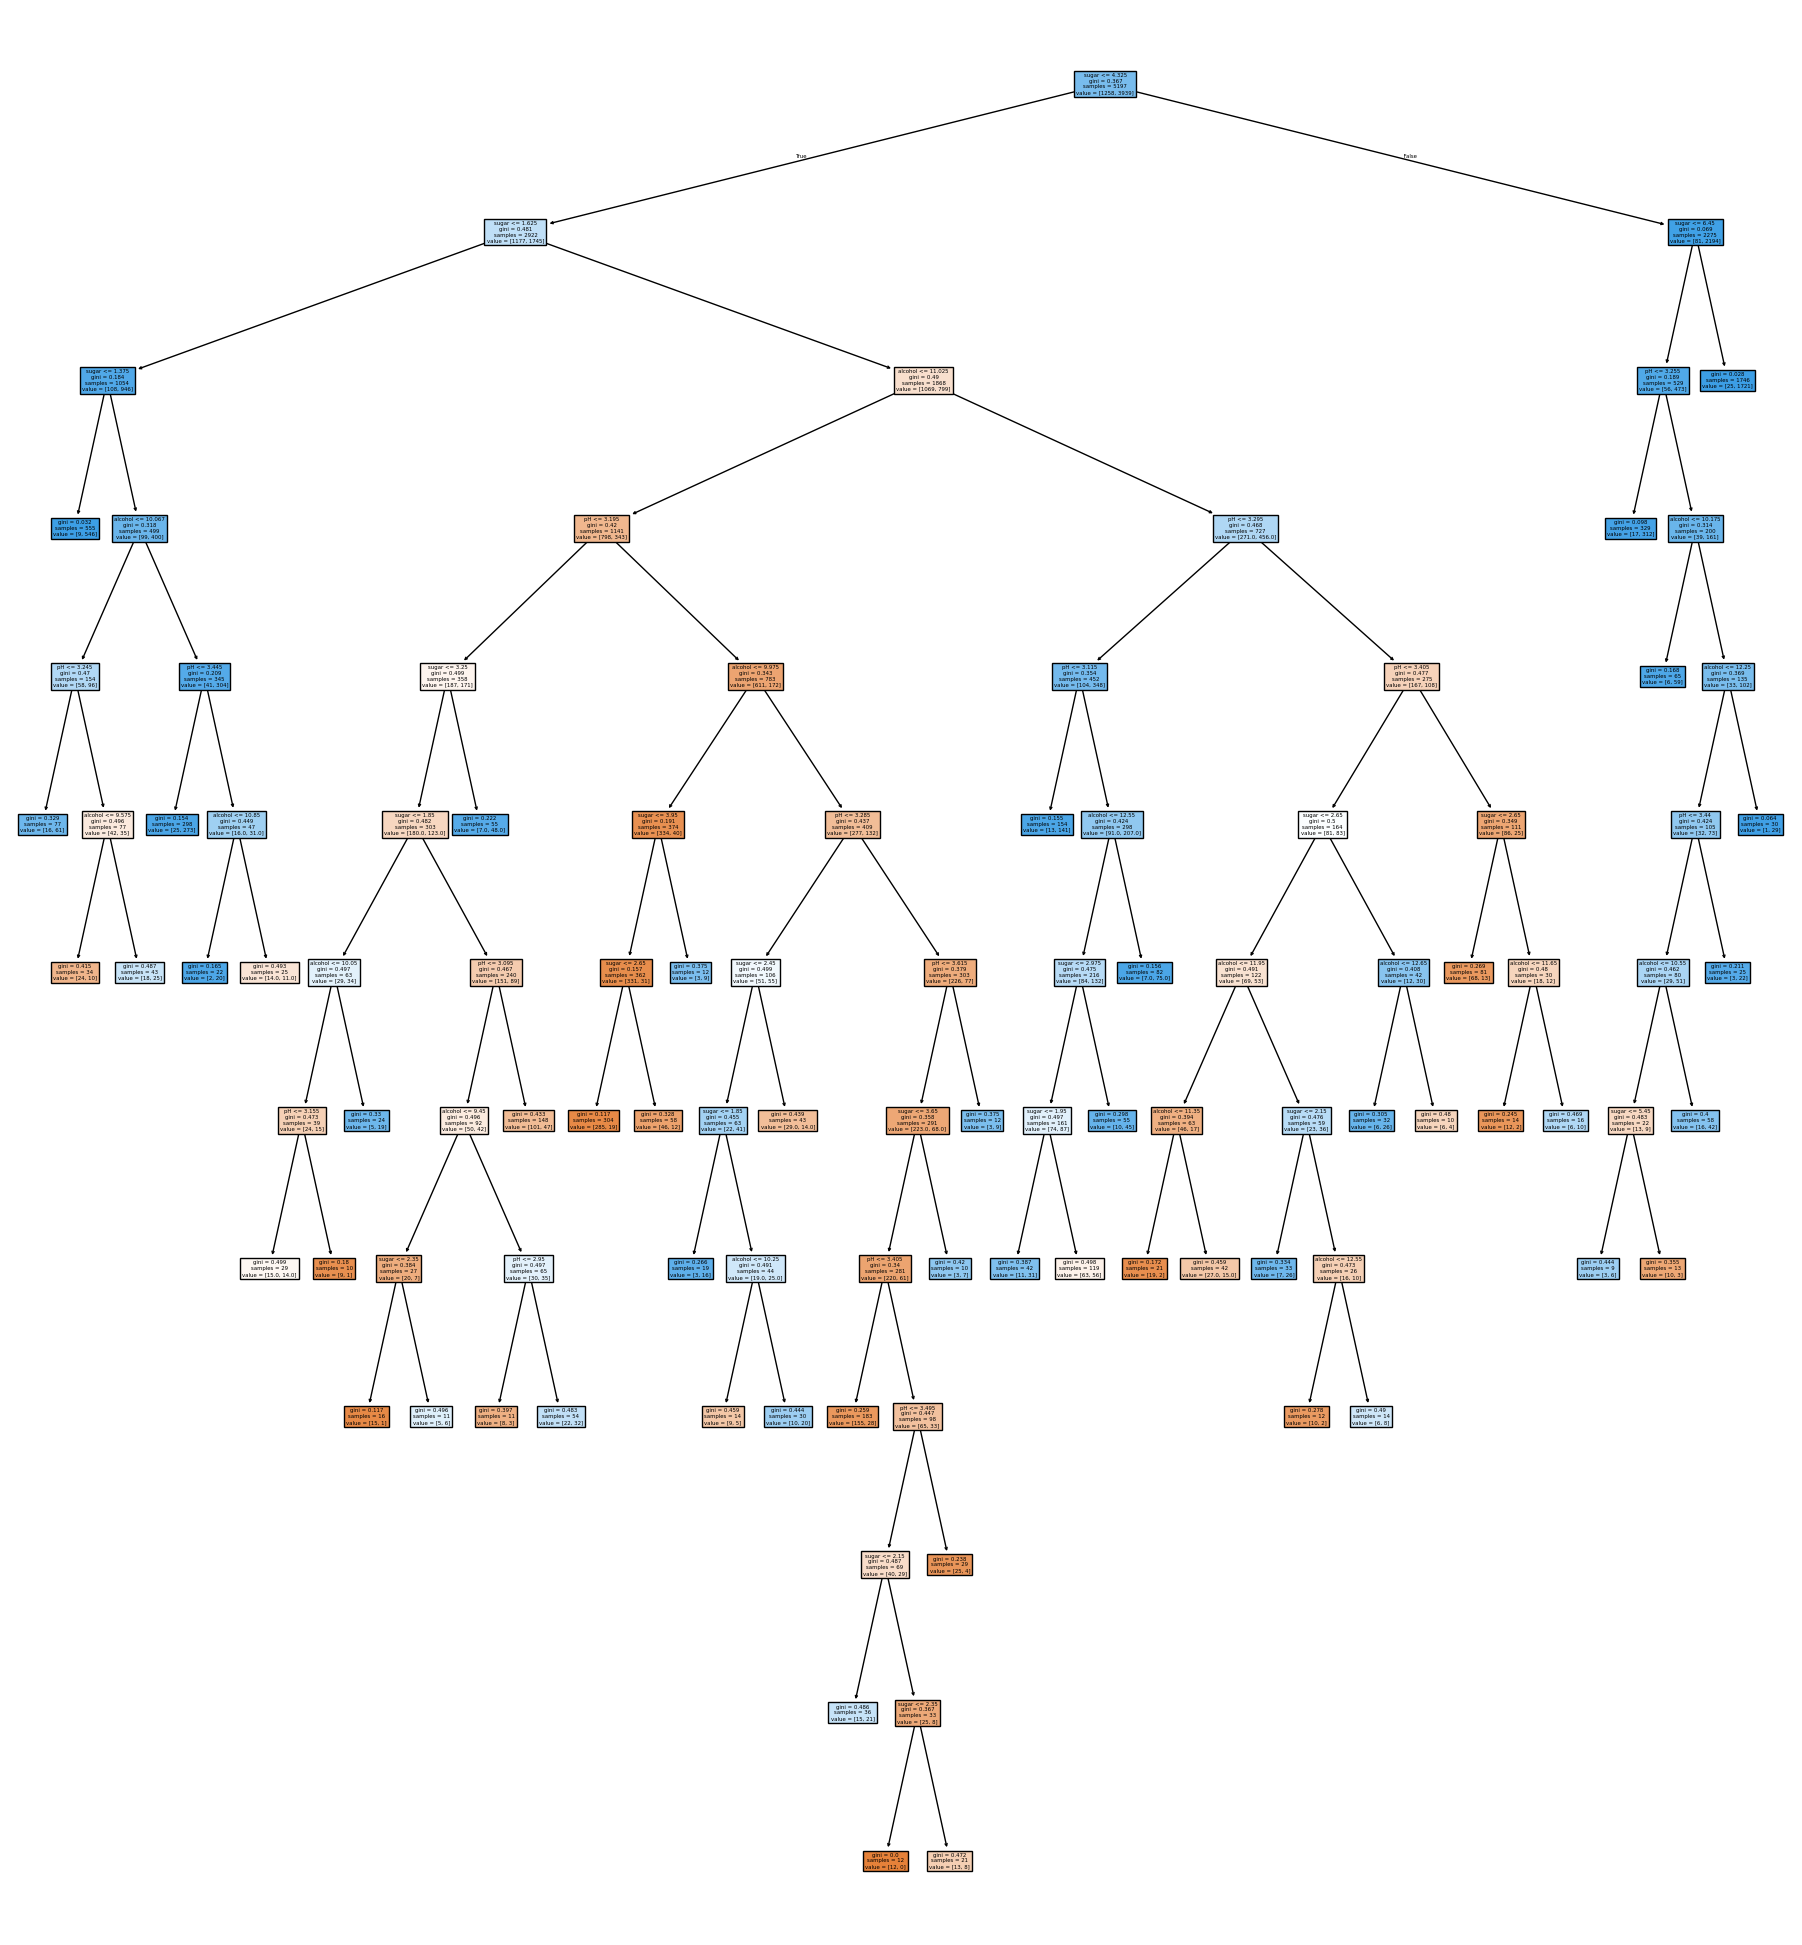

In [100]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(23,25))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [101]:
gs.predict_proba(test_input[0:5])

array([[0.01431844, 0.98568156],
       [0.9375    , 0.0625    ],
       [0.01431844, 0.98568156],
       [0.01431844, 0.98568156],
       [0.01431844, 0.98568156]])